**O notebook abaixo tem por objetivo treinar uma rede neural para aprender a verificar sinais indicativos com o dedo para efetuar comandos em um sistema de automação residencial**

Serão treinadas duas redes: 
Uma simples, utilizando-se a classe Sequencial do keras para instanciar uma rede com 3 camadas convolucionais (além das camadas de pooling e flatten);
Outra utilizando-se do conceito de transferência de conhecimento utilizando-se a rede mobilenet.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from skimage import io, transform
import cv2
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
print("Loaded...")
import zipfile
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Loaded...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "drive/MyDrive/Colab2/Datasets/fingers/"
zip_object = zipfile.ZipFile(file=dataset_path+"fingers.zip", mode="r")
zip_object.extractall()
zip_object.close()

KeyboardInterrupt: ignored

In [ ]:
dir_train = os.listdir("./fingers/train")
dir_test = os.listdir("./fingers/test")


In [ ]:
count = 0 
teste = []
for file in dir_train:
  if count == 6:
    break
  print('./fingers/train/' + file)
  count += 1
  img = io.imread('./fingers/train/' + file)               
  # teste.append(transform.resize(img, (128,128), mode = 'constant'))
  teste.append(img)


./fingers/train/3e7a6131-0ee3-4c15-9295-0a917f67a08c_3R.png
./fingers/train/6b96a7bf-64ec-411a-ae24-39d46e605011_4R.png
./fingers/train/2cd9a779-e19c-4caa-902a-cb9b2bc26d9d_1R.png
./fingers/train/1cb2c32b-5438-4803-aff2-01625ee32fd8_3L.png
./fingers/train/3dbff53a-1397-4723-934b-d5586a02d3e5_5L.png
./fingers/train/1f3e787f-c44c-4105-95c7-384e612c4ac3_3L.png


In [ ]:
train_data = []
test_data = []
train_label = []
test_label = []

for img in dir_train:
    img_read = io.imread('./fingers/train/' + img)
    # img_read = transform.resize(img_read, (128,128), mode = 'constant')
    img_read = transform.resize(img_read, (128,128), mode = 'constant')
    train_data.append(img_read)
    train_label.append(img[-6:-4])

for img in dir_test:
    img_read = io.imread('./fingers/test/' + img)
    img_read = transform.resize(img_read, (128,128), mode = 'constant')
    test_data.append(img_read)
    test_label.append(img[-6:-4])


    

In [ ]:
test_label[0:5]

['5R', '1R', '5L', '2L', '3L']

In [ ]:
labelencoder = LabelEncoder()
train_label = labelencoder.fit_transform(train_label)
test_label = labelencoder.transform(test_label)    

In [ ]:
labelencoder.inverse_transform(test_label[0:5])

array(['5R', '1R', '5L', '2L', '3L'], dtype='<U2')

In [ ]:
train_data[0].shape

(128, 128)

In [ ]:
labelencoder.classes_

array(['0L', '0R', '1L', '1R', '2L', '2R', '3L', '3R', '4L', '4R', '5L',
       '5R'], dtype='<U2')

In [ ]:
xtrain, xtest, ytrain, ytest = np.array(train_data), np.array(test_data), np.array(train_label), np.array(test_label)

In [ ]:
xtrain.shape

(18000, 128, 128)

In [ ]:
xtest.shape

(3600, 128, 128)

In [ ]:
ytest[10]

5

In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0], 128, 128, 1)
xtest = xtest.reshape(xtest.shape[0], 128, 128, 1)

In [ ]:
# ytrain = ytrain.reshape(ytrain.shape[0], 1)
# ytest = ytest.reshape(ytest.shape[0], 1)

In [ ]:
ytrain[12]

'4L'

In [ ]:
ytrain = tf.keras.utils.to_categorical(ytrain, num_classes = 12)
ytest = tf.keras.utils.to_categorical(ytest, num_classes = 12)

In [ ]:
ytrain[7]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(18000, 128, 128, 1) (3600, 128, 128, 1) (18000, 12) (3600, 12)


In [ ]:
xtrain = xtrain / 255
xtest = xtest / 255
# xtest = normalizador2.fit_transform(xtest)
# ytest = normalizador1.transform(ytest)


In [ ]:
normalizador1 = MinMaxScaler()
normalizador2 = MinMaxScaler()
ytrain = normalizador1.fit_transform(ytrain)
ytest = normalizador2.fit_transform(ytest)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size = 0.20, random_state = 5, shuffle = True)
# x_train_val, x_test_val, y_train_val, y_test_val = train_test_split(x_train, y_train, test_size = 0.20, random_state = 7, shuffle = True)

In [ ]:
normalizador1.inverse_transform(y_train)[45]

array([1.])

In [ ]:
x_train.shape

(14400, 128, 128, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape = (128, 128, 1), activation = 'relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
model.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
model.add(Flatten())

model.add(Dropout(0.40))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.40))
model.add(Dense(12, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 63, 63, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                    

In [ ]:
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
113/113 [==============================] - 25s 195ms/step - loss: 0.2966 - accuracy: 0.9044 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 2/10
113/113 [==============================] - 20s 178ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 9.2217e-04 - val_accuracy: 1.0000
Epoch 3/10
113/113 [==============================] - 20s 181ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 1.5771e-04 - val_accuracy: 1.0000
Epoch 4/10
113/113 [==============================] - 20s 179ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 5.2543e-05 - val_accuracy: 1.0000
Epoch 5/10
113/113 [==============================] - 20s 177ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 3.6245e-04 - val_accuracy: 1.0000
Epoch 6/10
113/113 [==============================] - 20s 177ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 1.0881e-06 - val_accuracy: 1.0000
Epoch 7/10
113/113 [==============================] - 20s 178ms/step - loss: 8.3059e-05 - accuracy: 1.0000 - v

In [ ]:
pred = model.evaluate(xtest,
                      ytest,
                    batch_size = 128)

print("Accuracy of model on test data is: ",pred[1]*100)

29/29 [==============================] - 2s 59ms/step - loss: 5.1867e-04 - accuracy: 0.9997
Accuracy of model on test data is:  99.97222423553467


In [ ]:
xtest[18].shape

(128, 128, 1)

In [ ]:
os.mkdir('teste')
!cp /content/drive/MyDrive/igor/foto3/maos/* /content/teste

(array([1.000e+00, 4.000e+00, 5.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        5.000e+00, 4.000e+00, 0.000e+00, 8.000e+00, 8.000e+00, 8.000e+00,
        0.000e+00, 1.900e+01, 2.400e+01, 0.000e+00, 2.400e+01, 3.700e+01,
        4.000e+01, 0.000e+00, 1.500e+01, 4.300e+01, 5.100e+01, 0.000e+00,
        6.400e+01, 1.020e+02, 0.000e+00, 1.110e+02, 1.410e+02, 2.060e+02,
        0.000e+00, 2.750e+02, 3.070e+02, 3.710e+02, 0.000e+00, 4.340e+02,
        4.070e+02, 0.000e+00, 5.010e+02, 6.190e+02, 6.830e+02, 0.000e+00,
        3.660e+02, 7.140e+02, 8.220e+02, 0.000e+00, 8.110e+02, 8.440e+02,
        0.000e+00, 8.420e+02, 9.310e+02, 9.880e+02, 0.000e+00, 1.001e+03,
        1.164e+03, 1.338e+03, 0.000e+00, 1.268e+03, 1.208e+03, 0.000e+00,
        1.122e+03, 1.153e+03, 1.025e+03, 0.000e+00, 9.650e+02, 8.410e+02,
        7.980e+02, 0.000e+00, 6.610e+02, 5.960e+02, 0.000e+00, 5.000e+02,
        5.060e+02, 3.920e+02, 0.000e+0

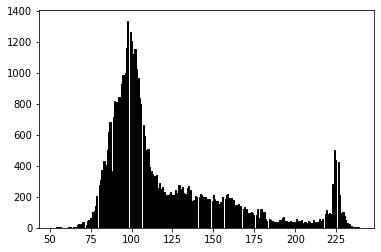

In [ ]:
img = cv2.imread("/content/teste/mao_esq4.png")
plt.hist (img.ravel(), bins = 256,  fc = 'k', ec = 'k') #calculando histograma

In [ ]:
imagens = []
entradas = []
for file in os.listdir("/content/teste"):
  # print(file)
  img = io.imread('/content/teste/' + file)
  # print(img.shape)
  # print(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # img = img[:,:, 0]
  img = cv2.resize(img, (128,128))
  # fgbg1 = cv2.bgsegm.createBackgroundSubtractorMOG()
  # img = fgbg1.apply(img)
  # img = cv2.Canny(img, 30, 200)
  # img = cv2.threshold(img, 100, 240, cv2.THRESH_BINARY)[1]
  # print(img )
  imagens.append(img)
  img = img.reshape(1, 128, 128, 1)  
  # img = img / 255
  entradas.append(img)

['0L' '0R' '1L' '1R' '2L' '2R' '3L' '3R' '4L' '4R' '5L' '5R']
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


array(['1L'], dtype='<U2')

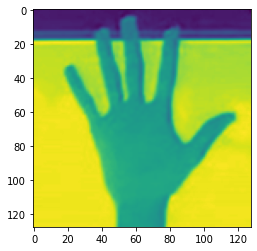

In [ ]:
b=imagens[10]
# print(b)
figs, axs = plt.subplots(1,1)
plt.imshow(b)

#Predição da entrada de teste com índica 18 relativa a mesma imagem que será mostrada
teste = imagens[10].reshape(1,128,128,1)
# teste = entradas[2]
print(labelencoder.classes_)
# print(teste.shape)
a=model.predict(teste)
print(a)
#List comprehension para transformar a array de probabilidades em zeros e uns
# d=list(a)
# print(d)
# Pegar o máximo que corresponde à lista encodada
e=np.where(a == np.max(a))[1]
print(e)
# Fazer a transformação inversa do encoder
f=labelencoder.inverse_transform(e)
f

In [ ]:
b=test_data[204]
figs, axs = plt.subplots(1,1)
plt.imshow(b)

#Predição da entrada de teste com índica 204 relativa a mesma imagem que será mostrada
print(xtest[2].shape)
a=model.predict(xtest[2].reshape(1,128,128,1))
print(a)
#List comprehension para transformar a array de probabilidades em zeros e uns
d=[int(x) for x in a[0]]
# Pegar o máximo que corresponde à lista encodada
e=[np.array(d.index(max(d)))]
# Fazer a transformação inversa do encoder
f=labelencoder.inverse_transform(e)
f

In [ ]:
y_test_val[18]

In [ ]:
b

In [ ]:
d=list(c[0])

In [ ]:
y_test[18]

In [ ]:
c=model.predict(a)
d=[int(x) for x in c[0]]
d

In [ ]:
e=np.array(d.index(max(d)))

In [ ]:
e=[d.index(max(d))]
e

In [ ]:
labelencoder.inverse_transform(e)

In [ ]:
from matplotlib import pyplot as plt
figs, axs = plt.subplots(3, 2)

count = 0
images = [] 
for file in dir_test:
  if count == 6:
    break
  images.append(cv2.imread("./fingers/test/"+file, cv2.IMREAD_UNCHANGED))
  count += 1

for i in range(3):
  for j in range(2):
    axs[i, j].plot(images[i+j])
    axs[0, 0].set_title('Axis [0, 0]')

for ax in axs.flat:
  print(ax)

#   plt.imshow(img)
#   plt.show()
#   count += 1


In [ ]:
 
x = np.arange(0.0, 2.0, 0.01)
y = 1 + np.sin(2 * np.pi * x)
 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
ax1.plot(x, y, color="orange")
ax2.plot(x, y, color="green")
ax3.plot(x, y, color="blue")
ax4.plot(x, y, color="magenta")
ax5.plot(x, y, color="black")
ax6.plot(x, y, color="red")